# Predict whether a pokemon is legendary

Authors : Eliot Calimez, Erwan Le Blévec, Kenza Ben jelloun, Matthieu Dubois, Romain Bernard and Vincent Tchoumb

# Table of contents

Introduction  
Getting the data  
The data  
The labels  
Data Analysis  
Workflow

# Introduction

![pokemon](img/pokemon.jpg)

### Context
Fascinated by Pokemon's world, you've always wondered what makes them so special! This challenge is for you! Indeed, in this challenge, we offer you the possibility to predict with the help of the various attributes if a pokemon is legendary or not. Whether you're an amateur or professional pokemon player, you'll be able to build stronger, more balanced teams, as well as gain a better understanding of the mechanics that make legendary Pokémon so special.

### Goal of the challenge
ghbjnkffffffffffffffffffffff


# Getting the data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from problem import get_train_data
#data_train, labels_train = get_train_data()

# Pas encore les données !!!!!!!!!!!!!!!!! (provisoire)

In [7]:
pokemon = pd.read_csv("data/initial_data/pokemon.csv")

In [8]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [9]:
data = pokemon.drop(columns=['Legendary','#'])
labels = pokemon['Legendary'].astype(float)

In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(data, labels)

# The data

### We start with inspecting the trainning data

In [11]:
data_train

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
435,Chimchar,Fire,NaN,44,58,44,58,44,61,4
502,Drapion,Poison,Dark,70,90,110,60,75,95,4
751,Aegislash Shield Forme,Steel,Ghost,60,50,150,50,150,60,6
416,Registeel,Steel,NaN,80,75,150,75,150,50,3
367,Zangoose,Normal,NaN,73,115,60,60,60,90,3
...,...,...,...,...,...,...,...,...,...,...
239,Piloswine,Ice,Ground,100,100,80,60,60,50,2
692,Heatmor,Fire,NaN,85,97,66,105,66,65,5
204,Jumpluff,Grass,Flying,75,55,70,55,95,110,2
121,Chansey,Normal,NaN,250,5,5,35,105,50,1


#### The data consists of 11 primary inputs variables :
        - 'Name' : each pokemon has a unique name
        - 'Type 1' and  'Type 2' : These 2 columns represent the types of attacks a pokemon can send. Each attack type has its own strengths and weaknesses against other attack types, so players must be strategic in selecting Pokemon and attack types for each battle.
        - 'HP' : Hit Points is the amount of damage a Pokemon can take before it is defeated. HP is therefore an indicator of a Pokemon's health and its ability to survive enemy attacks.
        - 'Attack' and 'Sp.Atk' : represent the offensive power of a Pokemon in an attack or special attack
        - 'Defense' and 'Sp.Def' : represent Pokemon's ability to resist enemy attacks and reduce the damage it takes.
        - 'Speed' : represents how fast a Pokemon moves. In the Pokemon universe, 'Speed' represents how fast a Pokemon moves or attacks in battle. Speed is one of the basic attributes that determine a Pokemon's speed in battle. In addition to its offensive advantages, high Speed can also help a Pokemon avoid enemy attacks. Pokemon with high Speed are more likely to dodge opposing attacks and defend against enemy attacks.
        - 'Total' : This feature reprent the total of the features 'HP', 'Attack', 'Sp.Atk', 'Defense', 'Sp.Def' and 'Speed' of a pokemon
        - 'Generation' : refers to the period during which a Pokemon has been introduced into the game.
        

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 387 to 55
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        600 non-null    object
 1   Type 1      600 non-null    object
 2   Type 2      315 non-null    object
 3   Total       600 non-null    int64 
 4   HP          600 non-null    int64 
 5   Attack      600 non-null    int64 
 6   Defense     600 non-null    int64 
 7   Sp. Atk     600 non-null    int64 
 8   Sp. Def     600 non-null    int64 
 9   Speed       600 non-null    int64 
 10  Generation  600 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 56.2+ KB


Not all pokemons have 2 types of attacks but some have only one

# The labels

Each pokemon is considered as legendary or not (1 or 0)

In [9]:
labels_train.head()

387    0.0
654    0.0
649    0.0
695    0.0
651    0.0
Name: Legendary, dtype: float64

In [10]:
np.unique(labels_train, return_counts=True)

(array([0., 1.]), array([549,  51], dtype=int64))

As we can see, the dataset is very unbalanced and that's why the f1-score for the class 1 and the balanced accuracy are taken into account in our metric

# Data Analysis

## Some statistics

In [11]:
data_train.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,434.240000,68.660000,78.98500,73.656667,73.128333,71.120000,68.690000,3.321667
std,120.762197,25.361251,31.87572,31.427296,33.129057,28.361704,29.860956,1.655122
min,180.000000,1.000000,5.00000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,330.000000,50.000000,55.00000,50.000000,47.750000,50.000000,45.000000,2.000000
50%,450.000000,65.000000,75.00000,70.000000,65.000000,69.000000,65.000000,3.000000
75%,515.000000,80.000000,100.00000,90.000000,95.000000,90.000000,90.000000,5.000000
max,780.000000,255.000000,190.00000,230.000000,194.000000,230.000000,180.000000,6.000000


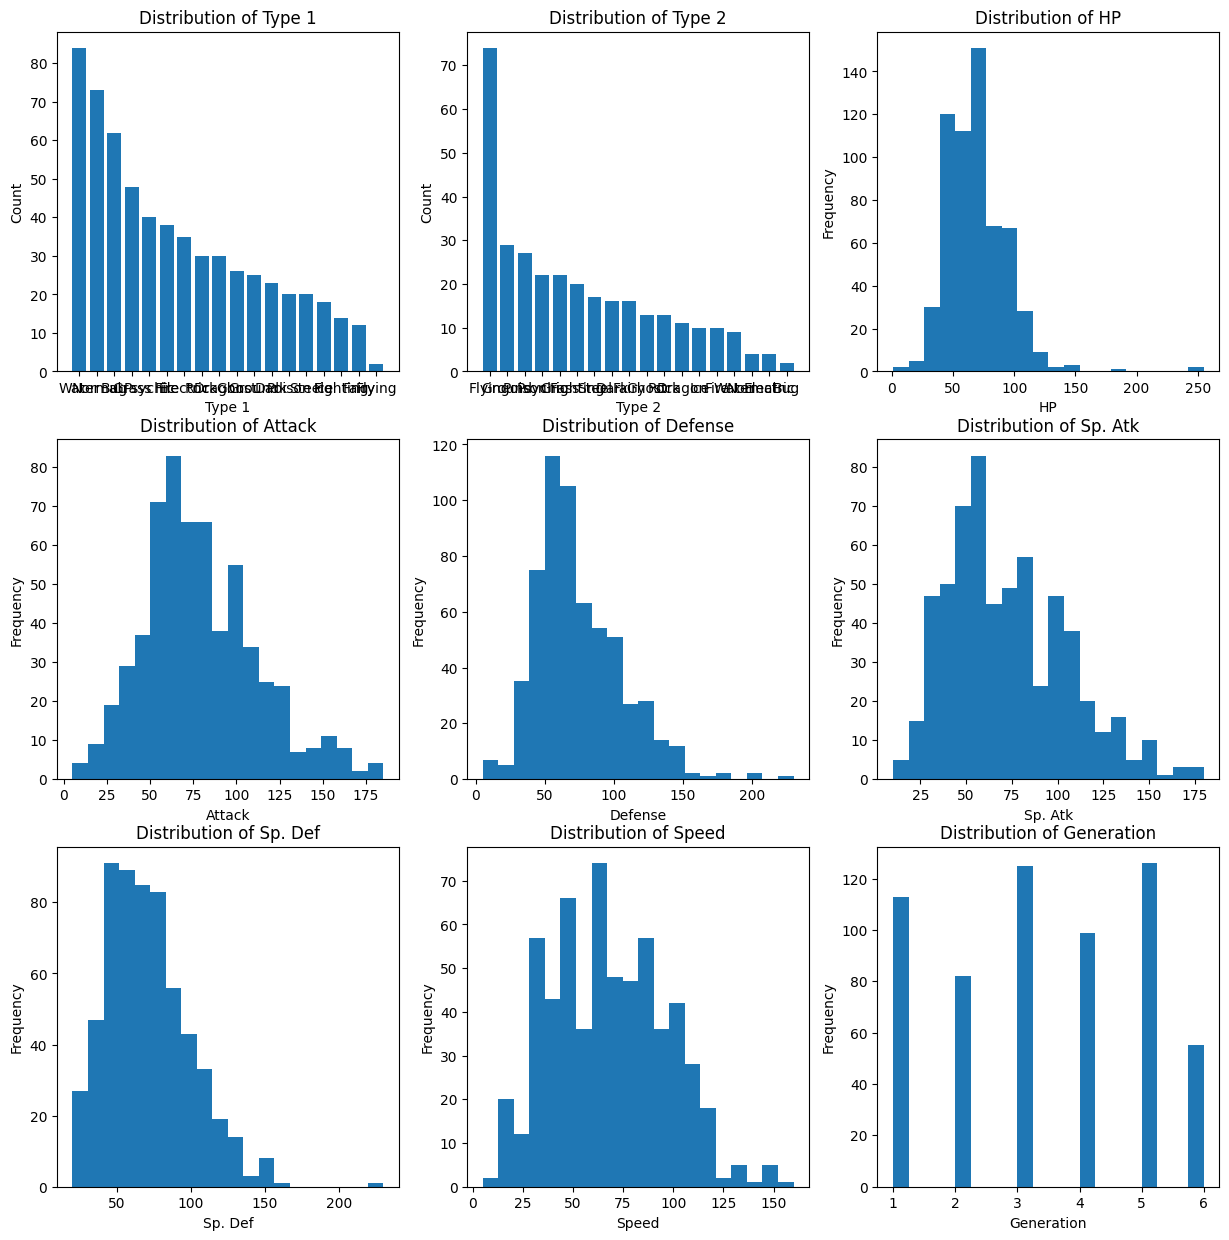

In [22]:
import matplotlib.pyplot as plt


cols_to_plot = [col for col in data_train.columns if col != "Name"]
num_plots = len(cols_to_plot)

num_rows = int(num_plots / 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))


axes = axes.flatten()


for i, col in enumerate(cols_to_plot):

    col_type = data_train[col].dtype
    

    if col_type == 'object':  # categorical (string) data
        value_counts = data_train[col].value_counts()
        axes[i].bar(value_counts.index, value_counts.values)
        axes[i].set_title('Distribution of {}'.format(col))
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    else:  # numerical data
        axes[i].hist(data_train[col], bins=20)
        axes[i].set_title('Distribution of {}'.format(col))
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')


plt.show()


## Visualisation of relationships between numerical variables

In [12]:
df_tot = data_train.copy()
df_tot['Label'] = labels_train

<Figure size 640x480 with 0 Axes>

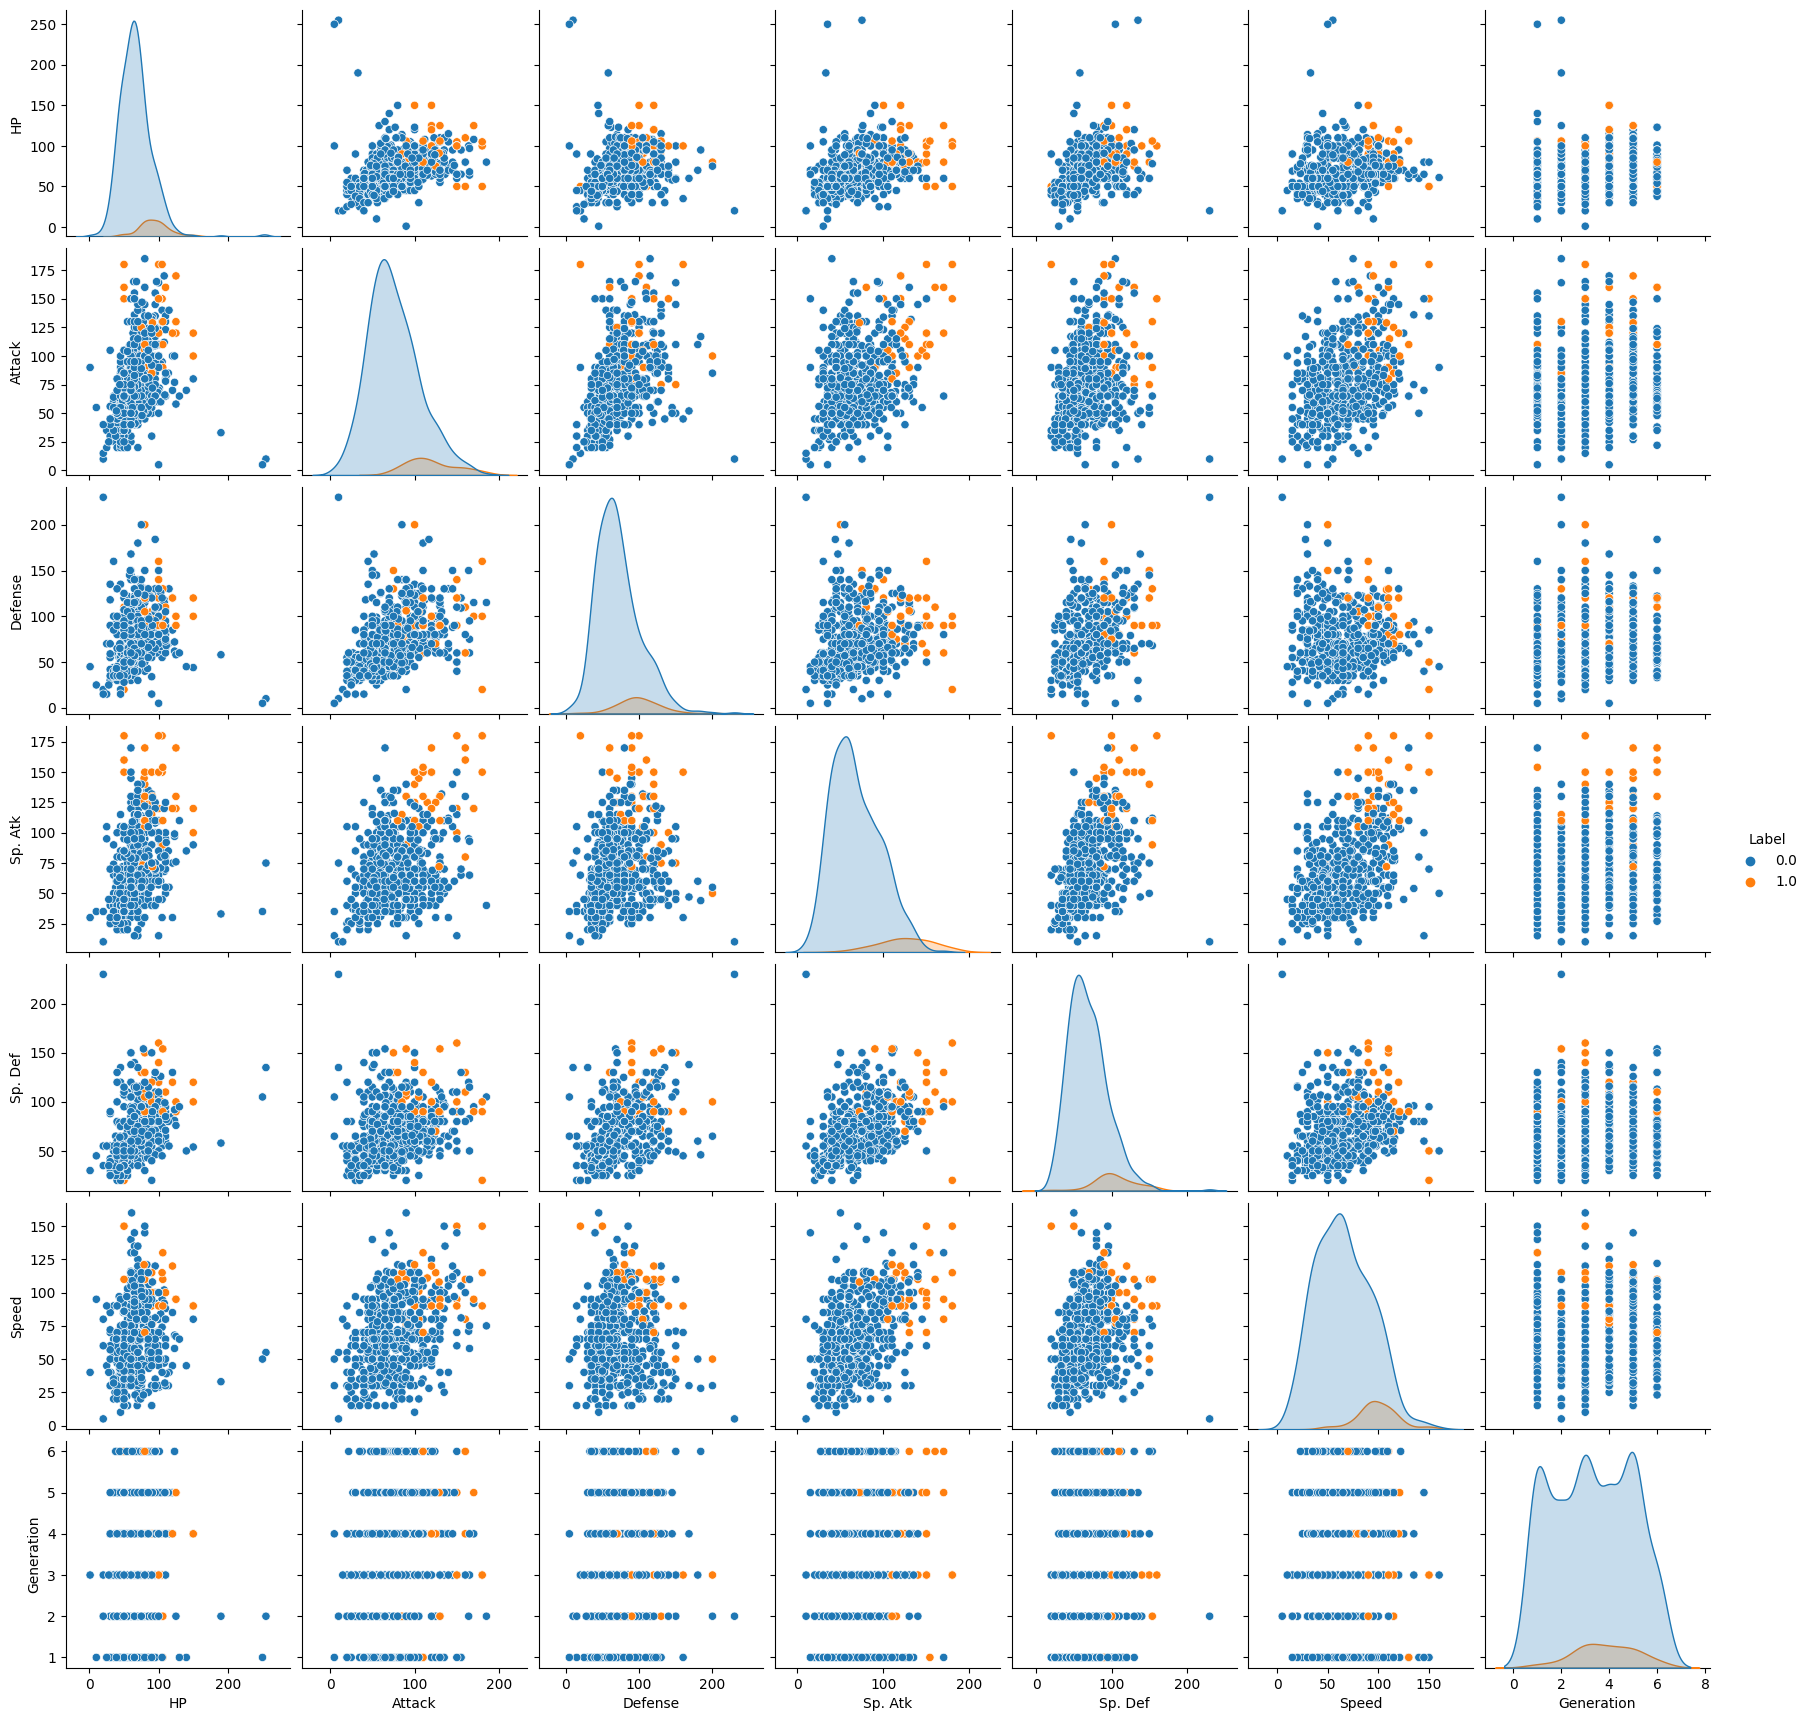

In [13]:
plt.figure()
sns.pairplot(df_tot, hue='Label')
plt.show()

## Correlation between features

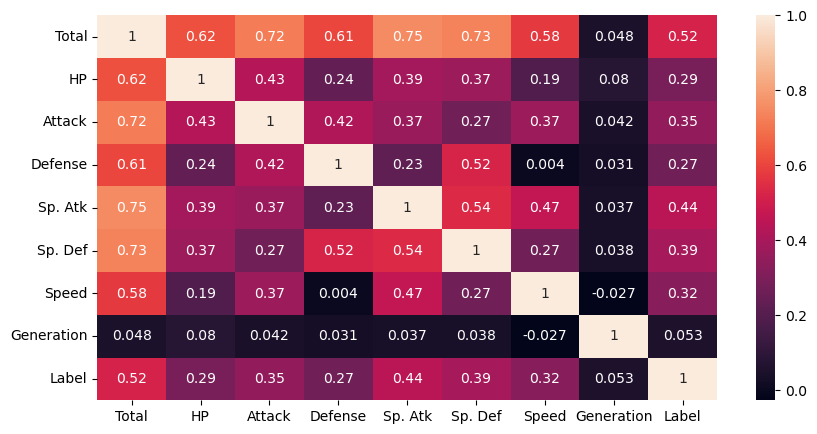

In [14]:
num_cols = df_tot.select_dtypes(include='number').columns.tolist()
corr_matrix = df_tot[num_cols].corr(method='pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

## Repartition of Attack Type

<AxesSubplot: >

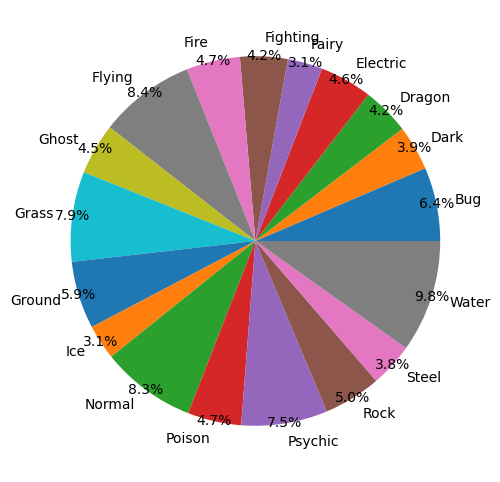

In [15]:
plt.figure(figsize=(8,6))
(data_train['Type 2'].value_counts() + data_train['Type 1'].value_counts()).plot(kind='pie', autopct='%1.1f%%',pctdistance=1.0)

# Workflow

![Workflow](img/workflow.png)

## The model to submit
The submission consists of one file: estimator.py which defines a get_estimator function returning a scikit-learn model from which we will call fit and predict methods. The prediction should be in the form of a (n_samples, 2) array with the probabilities of the two classes.

An example get_estimator, adding an selector of numerical features, a standard scaler and a classifier doing a Logistic Regression:

In [16]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def selec_num_features(X_df):
    """
    For a given dataframe, return only the dataset with numerical features

    Parameters
    ----------
    X : dataframe
    """
    
    num_features = X_df.select_dtypes(include='number').columns.tolist()
    
    return X_df[num_features]


class FeatureExtractor(BaseEstimator):
    def fit(self, X, y):
        return self

    def transform(self, X):
        return selec_num_features(X)


class Classifier(BaseEstimator):
    def __init__(self):
        self.model = LogisticRegression()
 
        
    def fit(self, X, y):
        self.model.fit(X, y)
 
    def predict(self, X):
        y_pred = self.model.predict_proba(X)
        return y_pred


def get_estimator():
    feature_extractor = FeatureExtractor()

    classifier = Classifier()

    pipe = make_pipeline(feature_extractor, StandardScaler(), classifier)
    return pipe

Using thus model interactively in the notebook to fit on the training data and predict for the testing data:

In [17]:
model = get_estimator()

In [18]:
model.fit(data_train, labels_train)

Pipeline(steps=[('featureextractor', FeatureExtractor()),
                ('standardscaler', StandardScaler()),
                ('classifier', Classifier())])

In [19]:
y_pred = model.predict(data_test)

The predictions are in a 2D array :

In [20]:
y_pred.shape

(200, 2)

# Evaluation

We evaluate for each pokemon blablablabla

In [21]:
from sklearn.metrics import log_loss, classification_report, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay

In [22]:
print(f"The log_loss of the default model is " f"{log_loss(labels_test, y_pred):.3f}")

The log_loss of the default model is 0.116


In [23]:
print(classification_report(labels_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       186
         1.0       0.58      0.50      0.54        14

    accuracy                           0.94       200
   macro avg       0.77      0.74      0.75       200
weighted avg       0.94      0.94      0.94       200



In [24]:
print(f"The accuracy of the default model is " f"{accuracy_score(labels_test, y_pred.argmax(axis=1)):.3f}")

The accuracy of the default model is 0.940


In [25]:
print(f"The balanced accuracy of the default model is " f"{balanced_accuracy_score(labels_test, y_pred.argmax(axis=1)):.3f}")

The balanced accuracy of the default model is 0.737


<Figure size 640x480 with 0 Axes>

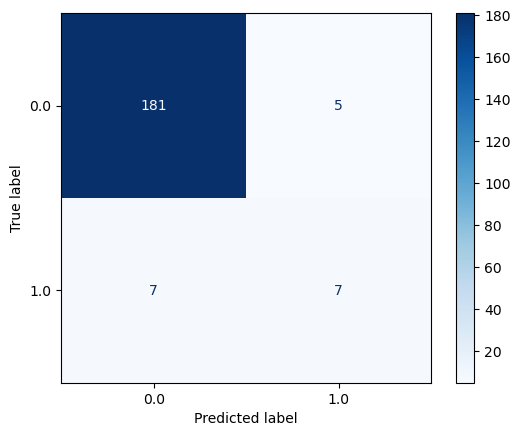

In [26]:
plt.figure()
ConfusionMatrixDisplay.from_predictions(labels_test, y_pred.argmax(axis=1),cmap='Blues')
plt.show()